In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('mtcars.csv')
data.head(2)

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [3]:
data.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_model    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
# Define X and y
X = data.loc[:,['hp','wt','am']]
y = data.mpg

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

In [12]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (24, 3)
X_test shape (8, 3)
y_train shape (24,)
y_test shape (8,)


In [13]:
model = LinearRegression()

In [14]:
#Train model
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [15]:
r2_score(y_test,y_predict)

0.47827708114324474

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

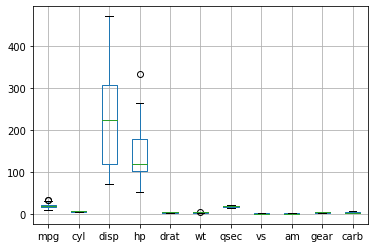

In [20]:
data.boxplot()
plt.show()

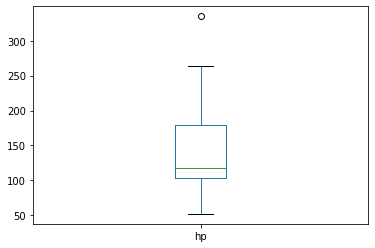

In [25]:
data.hp.plot(kind='box')

In [26]:
data[data.hp == data.hp.max()]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [28]:
data_hpoutlier_removed = data.drop(index = 30)

In [37]:
X = data_hpoutlier_removed.loc[:,['hp','wt','am']]
y = data_hpoutlier_removed.mpg
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=14)

In [38]:
model_ltr = LinearRegression()
model_ltr.fit(X_train,y_train)
y_predict = model_ltr.predict(X_test)
r2_score(y_test,y_predict)

0.8722053119342538